# Homework 12: CuPy-based histogram
by Rustam Guseyn-zade ([link canvas](https://skoltech.instructure.com/courses/3546/users/9673))

## Table of contents
* [Plotting function](#Plotting-function)
* [Plotting histogram](#Plotting-histogram)
* [cp.sum() vs np.sum()](#cp.sum()-vs-np.sum())

In [3]:
# import needed libraries
import argparse
import cupy as cp
import cProfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import mpi4py
import time

## Plotting function

$𝑓(𝑥)=(𝑧^2(𝑥)+𝑧^3(𝑥)−200𝑧4(𝑥))sin(100000(𝑥+0.5))$, where $𝑧(𝑥)=sin(3𝑥)−0.5$

In [4]:
@cp.fuse()
def z(x):
    return cp.sin(3 * x) - 0.5

@cp.fuse()
def f(x):
    return (cp.power(z(x),2) + cp.power(z(x),3) - 200 * cp.power(z(x),4)) * cp.sin(100000 * (x + 0.5))

minimum of function: -12.365544666168107, maximum: 12.374912294071224 


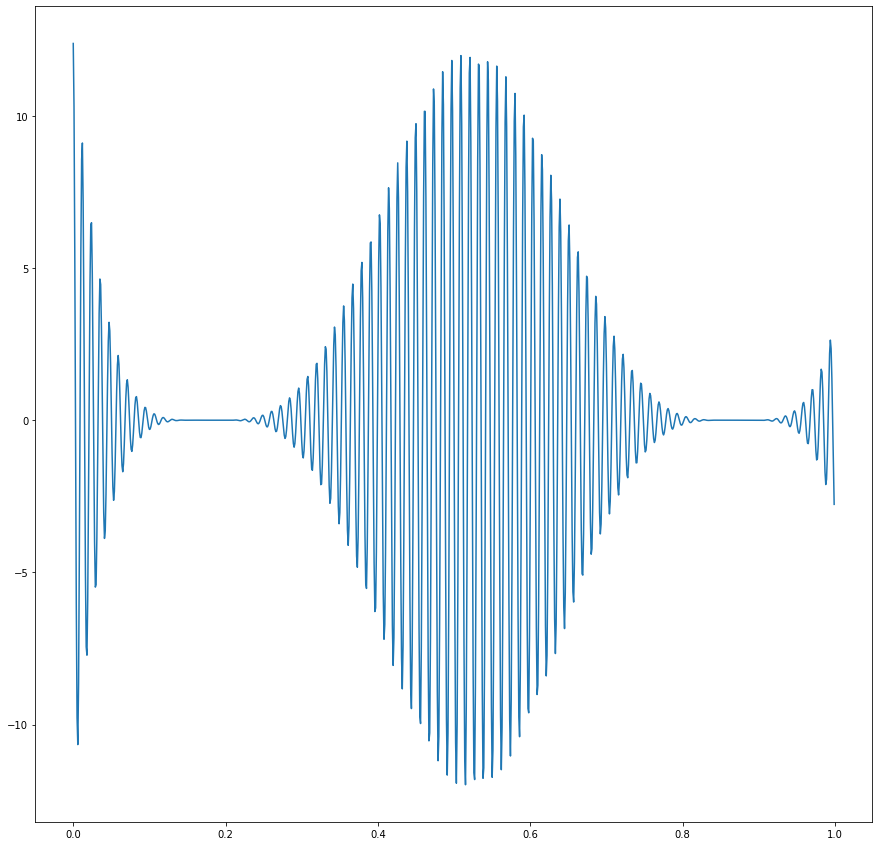

In [5]:
x = cp.linspace(0., 1., 10000000)
y = f(x)
plt.figure(figsize=(15, 15))
plt.plot(x.get()[::10000], y.get()[::10000])
print(f"minimum of function: {y.min()}, maximum: {y.max()} ")

## Plotting histogram


[array(243103), array(328194), array(423874), array(629269), array(4166630), array(2587768), array(627873), array(423379), array(327937), array(241973)]


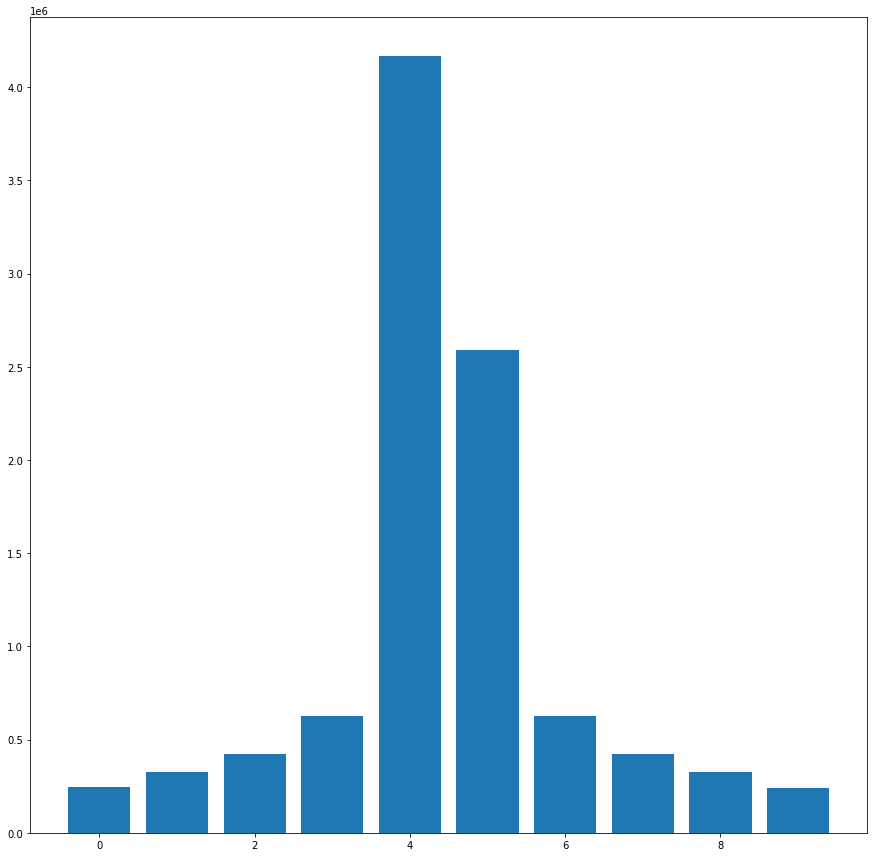

In [30]:
y_min = y.min()
y_max = y.max()
delta = (y_max - y_min) * 0.1
points_list = []
for i in range(10):
    mask = ((y <= (y_min + (i+1)*delta)) & (y >= (y_min + i*delta)))
    p = cp.sum(mask)
    points_list.append(p)

print(points_list)
plt.figure(figsize=(15, 15))
plt.bar(np.arange(10),points_list)
plt.show()


## cp.sum() vs np.sum()

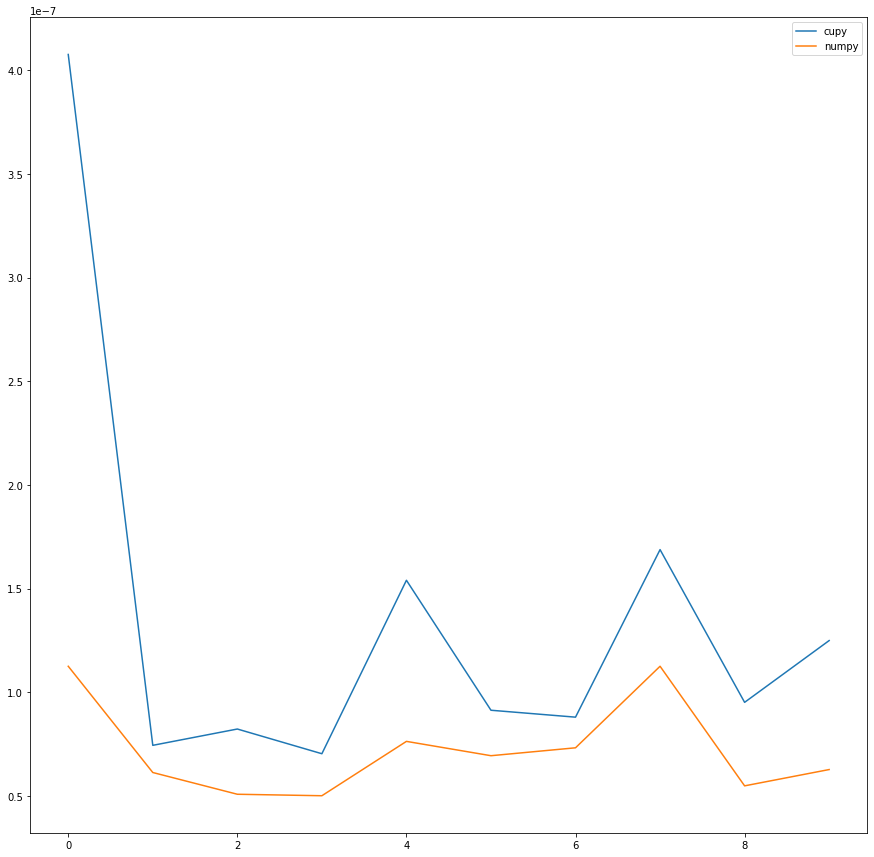

In [33]:
cp_times = []
np_times = []
for i in range(10):
  cp_mask = ((y <= (y_min + (i+1)*delta)) & (y >= (y_min + i*delta)))
  np_mask = cp.asnumpy(cp_mask)
  start = time.time()
  cp.sum(cp_mask)
  end = time.time()
  cp_times.append((end - start) / 1000)
  start = time.time()
  np.sum(cp_mask)
  end = time.time()
  np_times.append((end - start) / 1000)

plt.figure(figsize=(15, 15))
plt.plot(np.arange(10), cp_times, label='cupy')
plt.plot(np.arange(10), np_times, label='numpy')
plt.legend()